<a href="https://colab.research.google.com/github/vanquoc12/20146406-vanquoc-24022023/blob/main/BTVNtuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8186b82c022e0f94b0592a7e0d05c3739a284c43ddb36334dc5719e831f65456
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


199.7088506910331


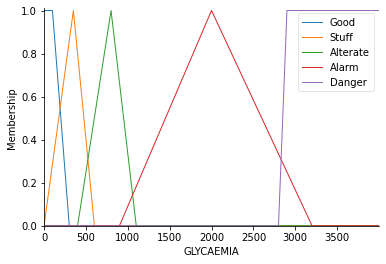

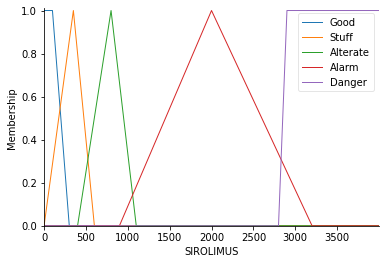

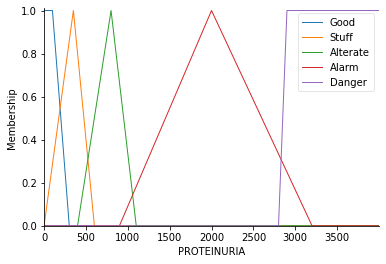

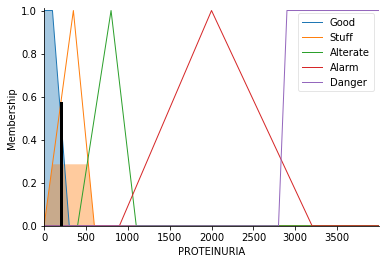

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
glycaemia=ctrl.Antecedent(np.arange(0,4000,1),'GLYCAEMIA')
sirolimus=ctrl.Antecedent(np.arange(0,4000,1),'SIROLIMUS')
proteinuria=ctrl.Consequent(np.arange(0,4000,1),'PROTEINURIA')

glycaemia['Good']=fuzz.trapmf(glycaemia.universe,[-2,0,100,300])
glycaemia['Stuff']=fuzz.trimf(glycaemia.universe,[0,350,600])
glycaemia['Alterate']=fuzz.trimf(glycaemia.universe,[400,800,1100])
glycaemia['Alarm']=fuzz.trimf(glycaemia.universe,[900,2000,3200])
glycaemia['Danger']=fuzz.trapmf(glycaemia.universe,[2800,2900,4500,4500])

sirolimus['Good']=fuzz.trapmf(sirolimus.universe,[-2,0,100,300])
sirolimus['Stuff']=fuzz.trimf(sirolimus.universe,[0,350,600])
sirolimus['Alterate']=fuzz.trimf(sirolimus.universe,[400,800,1100])
sirolimus['Alarm']=fuzz.trimf(sirolimus.universe,[900,2000,3200])
sirolimus['Danger']=fuzz.trapmf(sirolimus.universe,[2800,2900,4500,4500])

proteinuria['Good']=fuzz.trapmf(proteinuria.universe,[-2,0,100,300])
proteinuria['Stuff']=fuzz.trimf(proteinuria.universe,[0,350,600])
proteinuria['Alterate']=fuzz.trimf(proteinuria.universe,[400,800,1100])
proteinuria['Alarm']=fuzz.trimf(proteinuria.universe,[900,2000,3200])
proteinuria['Danger']=fuzz.trapmf(proteinuria.universe,[2800,2900,4500,4500])
glycaemia.view()
sirolimus.view()
proteinuria.view() 

rule1=ctrl.Rule(glycaemia['Good']&sirolimus['Good'],proteinuria['Good'])
rule2=ctrl.Rule(glycaemia['Stuff']&sirolimus['Good'],proteinuria['Stuff'])
rule3=ctrl.Rule(glycaemia['Alterate']&sirolimus['Good'],proteinuria['Alterate'])
rule4=ctrl.Rule(glycaemia['Alarm']&sirolimus['Good'],proteinuria['Alarm'])
rule5=ctrl.Rule(glycaemia['Danger']&sirolimus['Good'],proteinuria['Danger'])

rule6=ctrl.Rule(glycaemia['Good']&sirolimus['Good'],proteinuria['Good'])
rule7=ctrl.Rule(glycaemia['Stuff']&sirolimus['Good'],proteinuria['Stuff'])
rule8=ctrl.Rule(glycaemia['Alterate']&sirolimus['Good'],proteinuria['Alterate'])
rule9=ctrl.Rule(glycaemia['Alarm']&sirolimus['Good'],proteinuria['Alarm'])
rule10=ctrl.Rule(glycaemia['Danger']&sirolimus['Good'],proteinuria['Danger'])

rule11=ctrl.Rule(glycaemia['Good']&sirolimus['Good'],proteinuria['Good'])
rule12=ctrl.Rule(glycaemia['Stuff']&sirolimus['Good'],proteinuria['Stuff'])
rule13=ctrl.Rule(glycaemia['Alterate']&sirolimus['Good'],proteinuria['Alterate'])
rule14=ctrl.Rule(glycaemia['Alarm']&sirolimus['Good'],proteinuria['Alarm'])
rule15=ctrl.Rule(glycaemia['Danger']&sirolimus['Good'],proteinuria['Danger'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['GLYCAEMIA']=100
tipping.input['SIROLIMUS']=100
tipping.compute()
print(tipping.output['PROTEINURIA'])
proteinuria.view(sim=tipping)